Problem Statement:

We have a dataset on Product reviews from various E-Commerse websites
We need to figure out the main topics of these reviews to classify product for easier search.

We build a Topic Modelling Algorithm (LDA) to classify the topics.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
%matplotlib inline
from subprocess import check_output
import spacy, gensim
import string
from nltk.tokenize import RegexpTokenizer
from nltk.classify import SklearnClassifier
from nltk import re
import os
os.system('python -m spacy download en')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


0

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTaeMcEpr8cy5O3bDa8cpqv8RzIlIcvIxwfkE5PIZZCHiTAgNEEH_OfjjsK0TcQVx8JElwHN-czGLu4/pub?output=csv")
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [3]:
# tokenizing words in sentence
def tokenize(sentences, deacc=True): # deacc=True removes punctuations
    for sentence in sentences:
        yield(nltk.word_tokenize(sentence))  

data = df['reviews.text'].values.tolist()
data_words = list(tokenize(data))

In [4]:
#Removing stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + list(string.punctuation))

filtered_words = [[word for word in line if word not in stop_words] for line in data_words]


In [5]:
#Lemmetization of data to replace the words with their root word
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
lemma_words = lemmatization(filtered_words)

In [6]:
lemma_words_wc = [" ".join(review) for review in lemma_words]

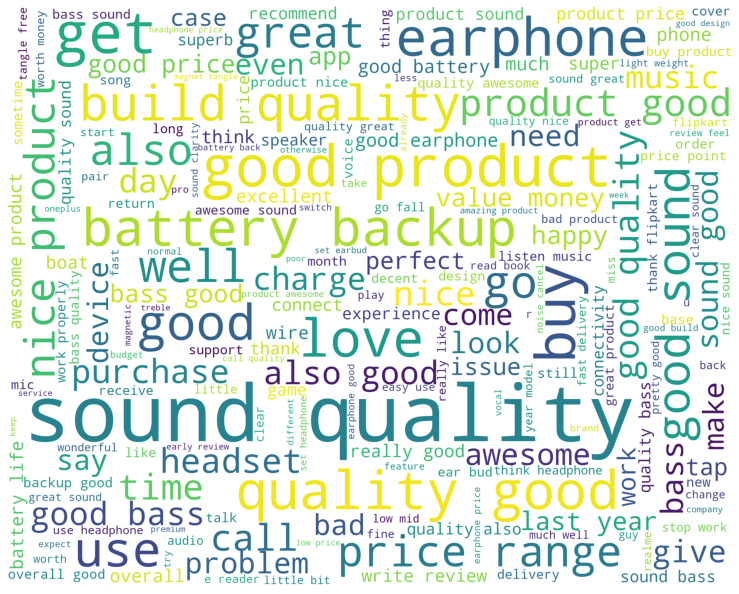

In [7]:
#Word cloud Diagram to get an insight into most occuring root words in data
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=2500, height=2000).generate(" ".join(lemma_words_wc))
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##Functions to obtain Feature-Word Matrix (Mostly used when labeled)

In [8]:
# Unifying the elements by replacing inner lists with the corresponding elements in the main list
import functools
import operator

lemma_words_flat = []
def transform(nested_list):
    for ele in nested_list:
        if type(ele) is list:
            lemma_words_flat.append(ele)
        else:
            lemma_words_flat.append([ele])
    return lemma_words_flat

lemma_words_flat =transform(lemma_words)
lemma_words_flat = functools.reduce(operator.iconcat, lemma_words_flat, [])

In [10]:
#Getting frequencies of words to know how ofte they occur in reviews
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(lemma_words_flat)
word_freq = nltk.FreqDist(lemma_words_flat)

In [26]:
#Creating a dictionary indicating the presence or absense of each word in each  reviews
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features
training_set = nltk.classify.apply_features(extract_features,lemma_words)
print(training_set)
classifier = nltk.NaiveBayesClassifier.train(training_set)

[({'contains(initially)': False, 'contains(trouble)': False, 'contains(decide)': False, 'contains(paperwhite)': False, 'contains(voyage)': False, 'contains(review)': False, 'contains(less)': False, 'contains(say)': False, 'contains(thing)': False, 'contains(great)': False, 'contains(spending)': False, 'contains(money)': False, 'contains(go)': False, 'contains(fortunately)': False, 'contains(friend)': False, 'contains(own)': False, 'contains(end)': False, 'contains(buy)': False, 'contains(basis)': False, 'contains(model)': False, 'contains(ppi)': False, 'contains(dollar)': False, 'contains(jump)': False, 'contains(turn)': False, 'contains(pricey)': False, 'contains(page)': False, 'contains(press)': False, 'contains(always)': False, 'contains(sensitive)': False, 'contains(fine)': False, 'contains(specific)': False, 'contains(setting)': False, 'contains(need)': False, 'contains(auto)': False, 'contains(light)': False, 'contains(adjustment)': False, 'contains(week)': False, 'contains(love)

#But, No labels are provided. I cannot go ahead with supervised techniques

# Build topics of your understnaing using LDA, Clustering

In [12]:
pd.options.display.max_colwidth = 200

In [24]:
# Creating a matrix of teken counts with Sparse representaton of counts
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=250, stop_words='english', lowercase=True, token_pattern='[a-zA-Z0-9]{3,}')
tf = vectorizer.fit_transform(lemma_words_flat) #.toarray()
tf_feature_names = vectorizer.get_feature_names()
vectorizer_ngram = CountVectorizer(max_df=0.9, min_df=250, stop_words='english', ngram_range=(1,2), lowercase=True, token_pattern='[a-zA-Z0-9]{3,}')
tf_ngram = vectorizer_ngram.fit_transform(lemma_words_flat) #.toarray()
tf_ngram_feature_names = vectorizer_ngram.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(tf.shape)
print(tf_ngram.shape)

(217778, 145)
(217778, 145)


In [28]:
tf_feature_names

['able',
 'actually',
 'add',
 'amazing',
 'app',
 'available',
 'awesome',
 'backup',
 'bad',
 'base',
 'bass',
 'battery',
 'big',
 'bit',
 'boat',
 'book',
 'box',
 'bud',
 'build',
 'button',
 'buy',
 'cable',
 'case',
 'charge',
 'cheap',
 'clear',
 'come',
 'comfortable',
 'compare',
 'connect',
 'content',
 'cover',
 'day',
 'delivery',
 'design',
 'device',
 'display',
 'download',
 'ear',
 'earbud',
 'earphone',
 'easy',
 'excellent',
 'expect',
 'experience',
 'fall',
 'far',
 'fast',
 'feature',
 'feel',
 'fine',
 'fit',
 'flipkart',
 'free',
 'game',
 'good',
 'great',
 'happy',
 'hdx',
 'headphone',
 'headset',
 'hear',
 'high',
 'hour',
 'include',
 'issue',
 'item',
 'know',
 'life',
 'light',
 'like',
 'listen',
 'little',
 'long',
 'look',
 'lot',
 'love',
 'low',
 'magnet',
 'make',
 'mean',
 'model',
 'money',
 'month',
 'movie',
 'music',
 'need',
 'new',
 'nice',
 'noise',
 'option',
 'order',
 'overall',
 'people',
 'perfect',
 'phone',
 'play',
 'point',
 'pretty

In [29]:
#Sparcity value
data_dense = tf.todense()
data_dense_ngram = tf_ngram.todense()
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")
print("Ngram Sparsicity: ", ((data_dense_ngram > 0).sum()/data_dense_ngram.size)*100, "%")

Sparsicity:  0.3409197787940329 %
Ngram Sparsicity:  0.3409197787940329 %


In [30]:
#Model with LatentDirichletAllocation Algorithm
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1,evaluate_every = -1, random_state=45)

In [31]:
#Fit Model to data and update model accordingly
lda_output = model.fit_transform(tf)

In [20]:
print(model)

LatentDirichletAllocation(n_jobs=-1, random_state=45)


In [32]:
#Log Likelihood and Perplexity
print("Log Likelihood: ", model.score(tf))
print("Perplexity: ", model.perplexity(tf))
print(model.get_params())

Log Likelihood:  -497934.0435295692
Perplexity:  102.03088779480098
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 45, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [ ]:
#Hyperparameter tuning, using grid search to train model seperately with various possible parameter combinations
#Here the commented search parameters take as long as 1 hour 45 minutes on google colab to get executed.
#We use this to know the best parameter values of the model with which we want to perform toping modeling on our data
from sklearn.model_selection import GridSearchCV
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
#search_params = {'n_components': [10], 'learning_decay': [.7]}
lda = LatentDirichletAllocation()
grid_model = GridSearchCV(lda, param_grid=search_params)
grid_model.fit(tf)

In [ ]:
#Printing the best parameters identified for the model while tuning using GridSearch
best_lda_model = grid_model.best_estimator_
print("Best Model's Params: ", grid_model.best_params_)
print("Best Log Likelihood Score: ", grid_model.best_score_)
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -103690.4101345252
Model Perplexity:  107.29147494482743


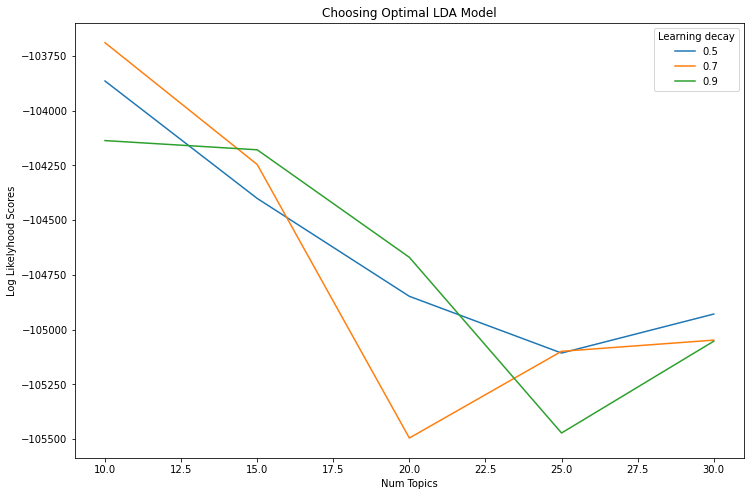

In [ ]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]

log_likelyhoods_5 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.5]
log_likelyhoods_7 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.7]
log_likelyhoods_9 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.9]

# Show graph comparing how different learning decay values perform 
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

####Dominant topic in each document

In [ ]:

lda_output = best_lda_model.transform(tf)
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(lemma_words_flat))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)
def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc1,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc3,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc5,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,2
Doc6,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc7,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,9
Doc8,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,8
Doc9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0


In [ ]:
len(df_document_topic)

218271

#topics distribution across documents

In [ ]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,118824
1,1,19677
2,4,15218
3,9,13446
4,7,11237
5,6,9828
6,2,9435
7,8,8525
8,3,7284
9,5,4797


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 29.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f0692d3ecd1d399c97958209a7ee8131d236d3ea760a51685e955518279c194a
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=7764f437a04d2c40d9e14271a6069f2b1b0be57b43b14951783a7a8ab629c787
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, tf, vectorizer, mds='tsne')
panel

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      32.420952   8.115230       1        1  14.151401
4       0.648955  71.707100       2        1  12.078723
9      71.019684   9.971006       3        1  11.255788
7       3.785981  33.185135       4        1  10.228128
6     -42.666500  -9.222070       5        1   9.573345
2      -3.621689 -43.526516       6        1   9.388456
8      -3.632402  -4.171708       7        1   8.964746
0     -36.584400  35.804413       8        1   8.740802
3      44.391380  50.615383       9        1   8.386057
5      40.235809 -31.591665      10        1   7.232554, topic_info=          Term         Freq        Total Category  logprob  loglift
55        good  6031.000000  6031.000000  Default  30.0000  30.0000
101    product  4116.000000  4116.000000  Default  29.0000  29.0000
131        use  3596.000000  3596.000000  Default  28.0000  28.0000
103    quality  3758.000000  3758.000000  Default  27.0000  27.0000
118      sound  3543.000000  3543.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
107     really     0.161454   955.456448  Topic10 -10.7826  -6.0591
59   headphone     0.161454  1040.462009  Topic10 -10.7826  -6.1444
18       build     0.161454   713.576991  Topic10 -10.7826  -5.7672
132       user     0.161454   336.953892  Topic10 -10.7826  -5.0169
54        game     0.161454   349.741127  Topic10 -10.7826  -5.0542

[442 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         8  0.997810      able
1         3  0.993694  actually
2         6  0.996501       add
3        10  0.999119   amazing
4         4  0.997940       app
...     ...       ...       ...
140       6  0.996862       way
141       7  0.998354      wire
142       7  0.999581      work
143       9  0.998136     worth
144       4  0.998544      year

[145 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 10, 8, 7, 3, 9, 1, 4, 6])

In [ ]:
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
df_topic_keywords.head()

,amp,ask,candidate,come,debate,face,fair,foxnews,good,gopdebate,hear,http,job,just,know,look,make,man,megynkelly,need,news,night,people,pick,president,question,realdonaldtrump,really,republican,right,say,speak,talk,tell,thing,think,time,tonight,trump,try,want,watch,win,woman
Topic0,0.100005,121.139705,0.100009,0.100001,0.100006,0.100000,0.100002,44.203971,0.100002,573.018953,0.100002,0.100006,0.100004,0.100004,0.100008,0.100003,0.100002,0.100002,0.248860,245.526281,0.100003,0.100007,0.100003,1.654782,0.100009,656.541086,0.100042,0.100004,0.100001,0.100003,0.100003,0.100002,0.100001,0.100003,0.100001,0.100008,0.100012,0.100002,0.100003,0.100001,0.100002,0.100006,276.192256,0.100002
Topic1,0.100003,168.311588,0.100014,0.100002,0.100003,80.710466,0.100001,0.100005,0.100003,915.614937,0.100003,0.100004,0.100003,0.100007,0.100005,106.297249,0.100005,0.100004,0.100003,0.100004,0.100002,0.100004,138.923111,0.100002,0.100003,78.658894,0.100003,0.100003,0.100001,0.100003,834.099965,0.100004,0.100002,0.100012,299.099972,0.100009,0.100005,0.100001,1031.099969,0.100002,0.100005,0.100004,130.827570,0.100005
Topic2,0.100004,0.100006,0.100002,0.100001,0.100004,0.100001,0.100002,76.253223,0.100002,1260.879036,0.100002,0.100005,0.100005,0.100003,88.141733,0.100004,0.100004,0.100001,670.951115,0.100006,0.100002,0.100006,0.100005,0.100002,0.100002,0.100003,885.099936,300.097007,68.763645,384.099960,0.100004,0.100001,0.100002,0.100002,0.100002,0.100009,0.100009,0.100003,0.100004,0.100003,0.100004,5.924976,110.278050,0.100007
Topic3,0.100003,250.431203,0.100006,320.099986,0.100003,0.100001,0.100000,0.100007,399.099972,889.077650,0.100003,0.100004,0.100003,0.100005,0.100004,0.100005,0.100006,0.100003,0.100004,0.100001,0.100002,0.100005,0.100004,0.100001,0.100002,0.100001,0.100002,0.100002,295.436341,0.100001,0.100003,0.100002,0.100002,0.100007,0.100006,0.100004,0.100004,0.100002,0.100003,300.099985,0.100002,0.100006,0.100002,0.100002
Topic4,0.100003,0.100002,0.100003,0.100002,0.100003,0.100002,0.100001,196.598514,0.100005,1361.866623,0.100003,0.100006,0.100004,0.100004,0.100006,280.902720,0.100005,0.100002,0.100004,0.100002,261.099979,941.099954,490.276859,175.663111,276.099977,0.100002,0.100003,0.100005,0.100001,0.100003,0.100005,0.100004,0.100002,256.090972,0.100004,0.100008,0.100004,0.100001,0.100003,0.100002,0.100003,0.100009,0.100776,0.100003


In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,question,gopdebate,win,need,ask,foxnews,pick,megynkelly,realdonaldtrump,time,president,candidate,think,know,night
Topic 1,trump,gopdebate,say,thing,ask,people,win,look,face,question,candidate,tell,think,just,know
Topic 2,gopdebate,realdonaldtrump,megynkelly,right,really,win,know,foxnews,republican,watch,think,time,woman,ask,need
Topic 3,gopdebate,good,come,try,republican,ask,tell,foxnews,make,thing,watch,candidate,night,look,just
Topic 4,gopdebate,night,people,look,president,news,tell,foxnews,pick,win,watch,think,know,http,say
Topic 5,candidate,gopdebate,woman,time,man,speak,pick,amp,question,know,win,http,ask,think,say
Topic 6,gopdebate,http,watch,think,hear,tonight,right,foxnews,night,look,time,win,candidate,news,people
Topic 7,gopdebate,just,want,make,know,job,need,think,face,foxnews,people,woman,say,time,watch
Topic 8,talk,gopdebate,tonight,candidate,really,amp,speak,fair,ask,tell,foxnews,job,think,right,win
Topic 9,debate,gopdebate,amp,fair,watch,foxnews,win,know,night,time,face,realdonaldtrump,man,need,think


In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [ ]:
no_top_words = 10
lda_df = display_topics(best_lda_model, tf_feature_names, no_top_words)

In [ ]:
lda_df.head(20)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,question,656.5,trump,1031.1,gopdebate,1260.9,gopdebate,889.1,gopdebate,1361.9,candidate,1049.1,gopdebate,4011.3,gopdebate,1207.0,talk,422.1,debate,1213.1
1,gopdebate,573.0,gopdebate,915.6,realdonaldtrump,885.1,good,399.1,night,941.1,gopdebate,1029.9,http,489.1,just,756.1,gopdebate,410.6,gopdebate,1029.7
2,win,276.2,say,834.1,megynkelly,671.0,come,320.1,people,490.3,woman,484.1,watch,473.8,want,501.1,tonight,329.4,amp,537.8
3,need,245.5,thing,299.1,right,384.1,try,300.1,look,280.9,time,390.1,think,438.6,make,448.1,candidate,117.1,fair,196.1
4,ask,121.1,ask,168.3,really,300.1,republican,295.4,president,276.1,man,331.1,hear,304.1,know,322.1,really,72.1,watch,169.6
5,foxnews,44.2,people,138.9,win,110.3,ask,250.4,news,261.1,speak,277.5,tonight,0.8,job,309.1,amp,71.4,foxnews,0.3
6,pick,1.7,win,130.8,know,88.1,tell,0.1,tell,256.1,pick,122.0,right,0.1,need,255.7,speak,68.7,win,0.1
7,megynkelly,0.2,look,106.3,foxnews,76.3,foxnews,0.1,foxnews,196.6,amp,0.2,foxnews,0.1,think,222.6,fair,64.1,know,0.1
8,realdonaldtrump,0.1,face,80.7,republican,68.8,make,0.1,pick,175.7,question,0.1,night,0.1,face,201.5,ask,0.5,night,0.1
9,time,0.1,question,78.7,watch,5.9,thing,0.1,win,0.1,know,0.1,look,0.1,foxnews,0.1,tell,0.1,time,0.1


In [ ]:
from sklearn.decomposition import NMF

In [ ]:
model_nmf = NMF(n_components=number_of_topics, random_state=45, alpha=.1, l1_ratio=.5, verbose=True)

In [ ]:
model_nmf.fit(tf)

violation: 1.0
violation: 0.40454073134899204
violation: 0.14795020594749433
violation: 0.07102996267506886
violation: 0.05141940259646153
violation: 0.04138133128346635
violation: 0.035265754750766015
violation: 0.029473244063702712
violation: 0.02545382788649189
violation: 0.023628479378917596
violation: 0.022169787663166622
violation: 0.02115961805494588
violation: 0.02040526907086251
violation: 0.01982636264786258
violation: 0.019360150847794143
violation: 0.018982566126816296
violation: 0.018681409940533765
violation: 0.01842887114340762
violation: 0.01820704272085647
violation: 0.018014029536448564
violation: 0.01784144653890525
violation: 0.017693011545734993
violation: 0.017564416016641105
violation: 0.017443081674299317
violation: 0.017326478348806313
violation: 0.017205561537332326
violation: 0.017091438062298445
violation: 0.0169796928134159
violation: 0.01687029800081477
violation: 0.0167627848561611
violation: 0.016657081936401308
violation: 0.01655309202294579
violation: 

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
    n_components=10, random_state=45, shuffle=False, solver='cd', tol=0.0001,
    verbose=True)

In [ ]:
no_top_words = 10
nmf_topics = display_topics(model_nmf, tf_feature_names, no_top_words)

In [ ]:
nmf_topics.head(20)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,gopdebate,18.0,trump,9.8,debate,10.2,candidate,9.9,realdonaldtrump,9.0,say,9.2,night,9.6,people,7.1,think,7.3,question,8.5
1,just,0.7,look,1.4,amp,2.3,speak,2.5,megynkelly,4.3,just,3.0,watch,1.7,president,3.0,need,4.4,ask,3.8
2,hear,0.5,ask,1.2,fair,1.6,really,1.1,win,1.6,want,1.3,good,0.7,news,3.0,job,3.4,pick,1.0
3,try,0.5,face,1.1,watch,1.5,amp,1.0,really,1.4,win,1.3,http,0.6,pick,2.9,tonight,0.6,megynkelly,0.8
4,want,0.5,win,0.7,know,0.8,fair,0.7,right,0.9,tell,0.9,win,0.4,thing,1.3,right,0.5,look,0.7
5,http,0.4,woman,0.2,time,0.2,pick,0.7,republican,0.7,ask,0.5,foxnews,0.3,gopdebate,0.4,make,0.3,come,0.6
6,tonight,0.4,make,0.1,need,0.2,win,0.5,know,0.7,woman,0.3,megynkelly,0.3,really,0.1,talk,0.2,face,0.6
7,talk,0.4,want,0.1,gopdebate,0.2,talk,0.4,foxnews,0.6,thing,0.3,make,0.3,know,0.1,good,0.2,foxnews,0.4
8,republican,0.4,http,0.0,win,0.1,thing,0.2,woman,0.6,time,0.3,gopdebate,0.2,right,0.1,time,0.2,time,0.3
9,make,0.3,talk,0.0,foxnews,0.1,http,0.2,watch,0.5,man,0.2,time,0.2,tell,0.1,foxnews,0.1,gopdebate,0.3


In [ ]:
!jupyter nbconvert --to html MasamManish_DataMiningProject.ipynb

[NbConvertApp] WARNING | pattern u'MasamManish_ForecasteraCaseStudy_E0065.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'note